In [1]:
import pandas as pd
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
from scipy.misc import imshow
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv("training.csv")
data.describe()


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [3]:
data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [8]:
data.shape

(7049, 31)

In [4]:
data['Image'] = data['Image'].apply(lambda x: list(map(int, x.split(" "))))

In [27]:
samples = data.iloc[0:50:10]



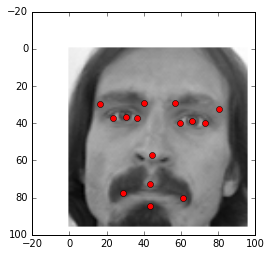

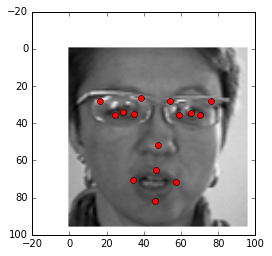

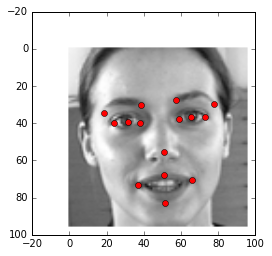

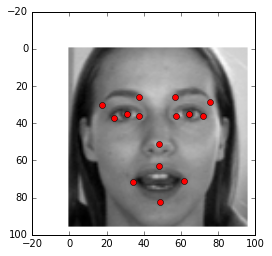

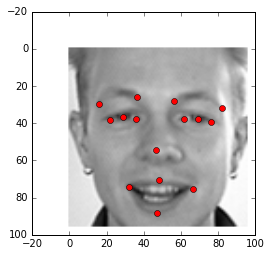

In [28]:
for idx, sample in samples.iterrows():
    first_picture = np.array(sample['Image'])
    first_picture = np.reshape(first_picture, (96,96))

    plt.figure()
    plt.imshow(first_picture,cmap='gray')


    plt.plot(sample['left_eye_center_x'],sample['left_eye_center_y'], marker='o', color='r', ls='')
    plt.plot(sample['right_eye_center_x'],sample['right_eye_center_y'], marker='o', color='r', ls='')

    plt.plot(sample['left_eye_inner_corner_x'],sample['left_eye_inner_corner_y'], marker='o', color='r', ls='')
    plt.plot(sample['left_eye_outer_corner_x'],sample['left_eye_outer_corner_y'], marker='o', color='r', ls='')


    plt.plot(sample['right_eye_inner_corner_x'],sample['right_eye_inner_corner_y'], marker='o', color='r', ls='')
    plt.plot(sample['right_eye_outer_corner_x'],sample['right_eye_outer_corner_y'], marker='o', color='r', ls='')



    plt.plot(sample['left_eyebrow_inner_end_x'],sample['left_eyebrow_inner_end_y'], marker='o', color='r', ls='')
    plt.plot(sample['right_eyebrow_inner_end_x'],sample['right_eyebrow_inner_end_y'], marker='o', color='r', ls='')


    plt.plot(sample['left_eyebrow_outer_end_x'],sample['left_eyebrow_outer_end_y'], marker='o', color='r', ls='')
    plt.plot(sample['right_eyebrow_outer_end_x'],sample['right_eyebrow_outer_end_y'], marker='o', color='r', ls='')


    plt.plot(sample['nose_tip_x'],sample['nose_tip_y'], marker='o', color='r', ls='')

    plt.plot(sample['mouth_left_corner_x'],sample['mouth_left_corner_y'], marker='o', color='r', ls='')
    plt.plot(sample['mouth_right_corner_x'],sample['mouth_right_corner_y'], marker='o', color='r', ls='')
    plt.plot(sample['mouth_center_top_lip_x'],sample['mouth_center_top_lip_y'], marker='o', color='r', ls='')
    plt.plot(sample['mouth_center_bottom_lip_x'],sample['mouth_center_bottom_lip_y'], marker='o', color='r', ls='')


    plt.show()

In [16]:
data.count()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [9]:
data.dropna().shape

(2140, 31)

In [29]:
data.dropna()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238, 236, 237, 238, 240, 240, 239, 241, 241, ..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[219, 215, 204, 196, 204, 211, 212, 200, 180, ..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[144, 142, 159, 180, 188, 188, 184, 180, 167, ..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[193, 192, 193, 194, 194, 194, 193, 192, 168, ..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[147, 148, 160, 196, 215, 214, 216, 217, 219, ..."
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,"[167, 169, 170, 167, 156, 145, 106, 68, 52, 24..."
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,"[109, 109, 125, 141, 145, 139, 120, 81, 45, 34..."
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,"[178, 177, 178, 179, 179, 179, 181, 185, 188, ..."
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,"[164, 158, 118, 76, 66, 69, 59, 53, 43, 31, 35..."
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538,"[226, 227, 225, 224, 221, 220, 215, 210, 210, ..."


In [35]:
a = np.array([[1,2],[3,4]])
a[0,1]

2